In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
validate = pd.read_csv("validation.csv")

for i in train.columns:
    print(i)

# print(train["profit_margin"])

X_train = train.drop(["profit_margin"], axis=1)
X_test = test.drop(["profit_margin"], axis=1)
X_val = validate.drop(["profit_margin"], axis=1)
y_train = train["profit_margin"]
y_test = test["profit_margin"]
y_val = validate["profit_margin"]

print(len(train.columns))
print(len(X_train.columns))

popularity
budget
revenue
runtime
vote_average
vote_count
profit_margin
overview: life
overview: new
overview: young
overview: world
overview: man
overview: family
overview: love
overview: woman
overview: story
overview: finds
overview: old
overview: time
overview: father
overview: friends
overview: years
overview: war
overview: help
overview: wife
overview: town
overview: school
genres: Documentary
genres: Romance
genres: Animation
genres: Family
genres: Mystery
genres: Adventure
genres: Comedy
genres: Music
genres: War
genres: TV Movie
genres: Fantasy
genres: Western
genres: Action
genres: Horror
genres: History
genres: Drama
genres: Thriller
genres: Science Fiction
genres: Crime
original_language_cn
original_language_de
original_language_en
original_language_es
original_language_fr
original_language_hi
original_language_it
original_language_ja
original_language_ko
original_language_ml
original_language_other
original_language_ru
original_language_ta
original_language_te
original_lan

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Model 1

In [30]:
# define the model
model_1 = Sequential()
model_1.add(Dense(128, input_dim=61, activation='relu'))
model_1.add(Dense(64, activation='relu'))
#Output layer
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_1.summary()

history_1 = model_1.fit(X_train, y_train, epochs =100, validation_data=(X_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               7936      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
210/210 [==============================] - 1s 1ms/step - loss: 0.4867 - mean_absolute_error: 0.5611 - val_loss: 0.1385 - val_mean_absolute_error: 0.3020
Epoch 2/100
210/210 [==============================] - 0s 806us/step - loss: 0.0818 - mean_absolute_error: 0.2252 - val_loss: 0.0663 - val_mean_absolute_error: 0.2158
Epoch 3/100
210/210 [==============================] - 0s 734us/step - loss: 0.0547 - mean_absolute_error: 0.1822 - val_loss: 0.0499 - val_mean_absolute_error: 0.1860
Epoch 4/100
210/210 [==============================] - 0s 770us/step - loss: 0.0467 - mean_absolute_error: 0.1655 - val_loss: 0.0415 - val_mean_absolute_error: 0.1632
Epoch 5/100
210/210 [==============================] - 0s 725us/step - loss: 0.0410 - mean_absolute_error: 0.1544 - val_loss: 0.0379 - val_mean_absolute_error: 0.1582
Epoch 6/100
210/210 [==============================] - 0s 778us/step - loss: 0.0356 - mean_absolute_error: 0.1427 - val_loss: 0.0356 - val_mean_absolute_error: 0.1511


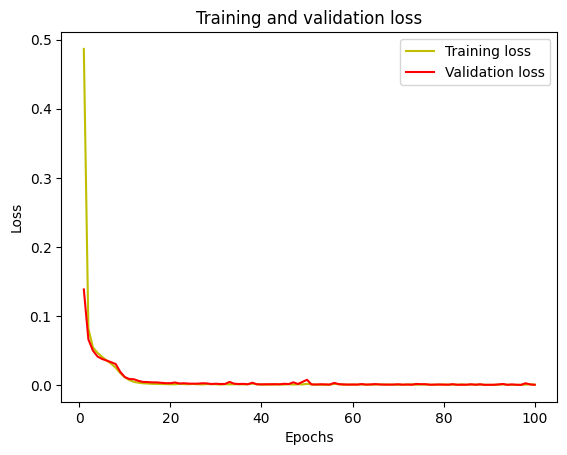

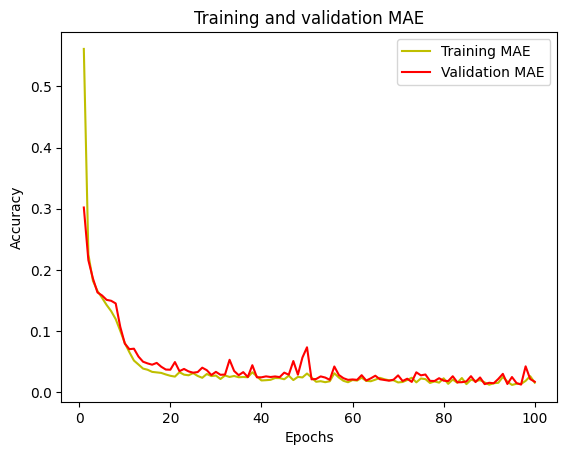

1/1 [==============================] - 0s 69ms/step
Predicted values are: 
 [[2.205695  ]
 [0.6636131 ]
 [1.517665  ]
 [0.00418459]
 [0.66030335]
 [2.1058438 ]
 [0.7570009 ]
 [1.0795089 ]
 [2.433463  ]
 [0.00878181]]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [31]:
from matplotlib import pyplot as plt

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_1.history['mean_absolute_error']
val_acc = history_1.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_1.predict(X_test[:10])
print("Predicted values are: \n", predictions)
print("Real values are: \n", y_test[:10])

# Model 2 - More hidden layers

In [32]:
# define the model
model_2 = Sequential()
model_2.add(Dense(128, input_dim=61, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(64, activation='relu'))
#Output layer
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_2.summary()

history_2 = model_2.fit(X_train, y_train, epochs =200, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               7936      
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 512)               131584    
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 64)                16448     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 320,385
Trainable params: 320,385
Non-tr

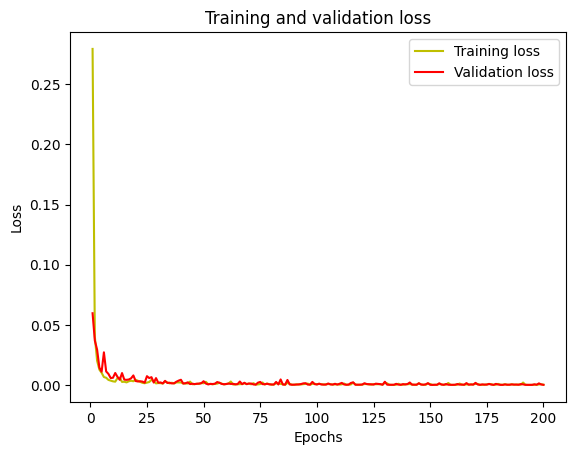

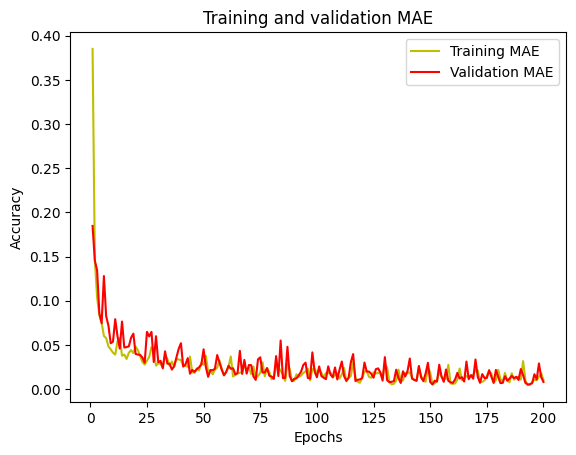

1/1 [==============================] - 0s 36ms/step
Predicted values are: 

0 [2.2103622]
1 [0.6541428]
2 [1.5300423]
3 [0.0010826]
4 [0.6862816]
5 [2.0945535]
6 [0.79410356]
7 [1.0981297]
8 [2.453739]
9 [0.00102536]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [33]:
from matplotlib import pyplot as plt

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_2.history['mean_absolute_error']
val_acc = history_2.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_2.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Model 3 Different inputs for hidden layers

In [42]:
import tensorflow as tf
# define the model
model_3 = Sequential()
model_3.add(Dense(100, input_dim=61, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(500, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(100, activation='relu'))
#Output layer
model_3.add(Dense(1, activation='linear'))

opt =  tf.keras.optimizers.Adam()

model_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_3.summary()

history_3 = model_3.fit(X_train, y_train, epochs =200, validation_data=(X_test, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               6200      
                                                                 
 dense_43 (Dense)            (None, 300)               30300     
                                                                 
 dense_44 (Dense)            (None, 500)               150500    
                                                                 
 dense_45 (Dense)            (None, 300)               150300    
                                                                 
 dense_46 (Dense)            (None, 100)               30100     
                                                                 
 dense_47 (Dense)            (None, 1)                 101       
                                                                 
Total params: 367,501
Trainable params: 367,501
Non-tr

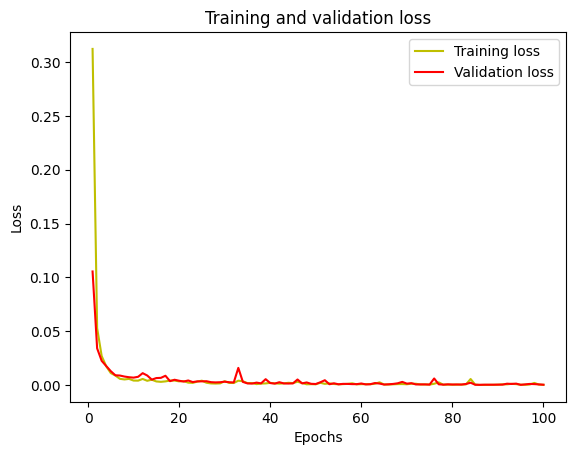

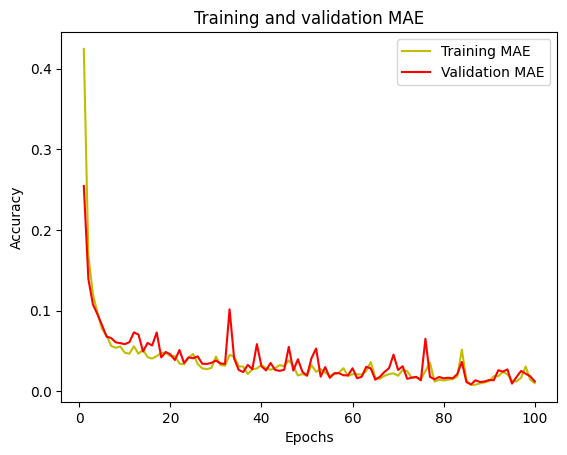

1/1 [==============================] - 0s 36ms/step
Predicted values are: 

0 [2.2033708]
1 [0.6625237]
2 [1.5201231]
3 [0.00294978]
4 [0.6577776]
5 [2.0999641]
6 [0.7794183]
7 [1.0631573]
8 [2.437654]
9 [0.00092892]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [40]:
from matplotlib import pyplot as plt

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_3.history['mean_absolute_error']
val_acc = history_3.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_3.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Analysis

In [41]:
print("-- MODEL 1 --")
mse, mae = model_1.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 2 --")
mse, mae = model_2.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 3 --")
mse, mae = model_3.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- MODEL 1 --
27/27 [==============================] - 0s 673us/step - loss: 5.4223e-04 - mean_absolute_error: 0.0172
Mean squared error:  0.0005422270041890442
Root mean squared error:  0.02328576827568814
Mean absolute error:  0.01724020019173622
-- MODEL 2 --
27/27 [==============================] - 0s 1ms/step - loss: 1.3080e-04 - mean_absolute_error: 0.0079
Mean squared error:  0.00013079728523734957
Root mean squared error:  0.011436664078189477
Mean absolute error:  0.007946024648845196
-- MODEL 3 --
27/27 [==============================] - 0s 961us/step - loss: 3.0477e-04 - mean_absolute_error: 0.0123
Mean squared error:  0.0003047673380933702
Root mean squared error:  0.017457586834765285
Mean absolute error:  0.01228678785264492


In [37]:
import scipy.stats as stats

pred = model_3.predict(X_test)
pred[pred < 0] = 0.0

tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)
print("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

27/27 [==============================] - 0s 1ms/step
T-Statistic: [-0.968  0.899 -0.16   1.684  0.875 -0.846  0.737  0.367 -1.265  1.687
 -0.863 -0.014 -1.169  1.617  0.255  1.65   1.589 -0.483  1.332 -0.867
 -0.703  0.367 -0.252 -0.744  1.625 -1.216 -0.671 -0.429  0.059  0.591
 -0.503 -0.74  -0.467 -0.627  1.688  1.317 -1.335 -1.335  1.632  1.448
 -1.08   0.79   1.219 -1.297 -0.452  1.528 -0.923 -0.538 -0.722  0.983
  1.644 -1.335  0.574  1.362  1.451  0.562 -0.08  -0.738 -0.63   0.13
  0.06  -0.377 -0.509  1.56  -0.679 -0.328  0.59  -0.636 -0.618 -1.279
  1.688  0.522 -0.312 -0.424  1.687 -0.987  1.688  1.518  0.549 -0.803
 -0.257  1.261  1.688  0.035  0.431 -0.937 -1.078 -0.321 -0.885 -1.281
 -0.159  1.052 -0.353  1.341  0.588 -0.669 -0.649 -0.915 -0.871 -0.74
  1.688  1.391  1.051 -0.677 -0.145 -0.7   -0.754 -1.209  1.688 -0.729
 -0.461 -0.998 -0.614 -1.034 -0.74  -1.065  1.597 -0.232  1.688 -0.74
 -1.335  1.656  0.034  1.088 -0.732 -0.516  1.068  1.132 -0.361  1.617
  0.034 -0.237